In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn import decomposition
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

import time

In [0]:
link1='https://drive.google.com/open?id=1LAXOvFLyMmK8Pkdw6efWhGHtIQpkGnYd'

fluff, id = link1.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv') 
training_data  = pd.read_csv('train.csv')

labels  = training_data['label']
training_data = training_data.drop("label",axis=1)
print(training_data.shape)

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(training_data)
print(standardized_data.shape)

1LAXOvFLyMmK8Pkdw6efWhGHtIQpkGnYd
(42000, 784)
(42000, 784)


###PCA

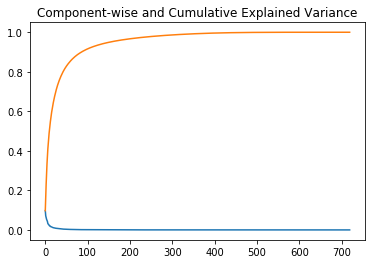

In [0]:
from sklearn.decomposition import PCA
n_components = 720
pca = PCA(n_components=n_components).fit(training_data)

training_data_pca = pca.transform(training_data)

plt.plot(range(n_components), pca.explained_variance_ratio_)
plt.plot(range(n_components), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
pass


In [0]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.linalg import eigh

def pla_plot(size , plot_point_size,fig_size): 
  df  = training_data[:size].copy()
  label = labels[:size].copy()

  standardized_data = StandardScaler().fit_transform(df)
  standardized_data.shape


  sample_data = standardized_data
  covariance_matrix = np.matmul(sample_data.T, sample_data)
  

  values, vectors = eigh(covariance_matrix)

  values = values[-2:]
  vectors = vectors[:,-2:]
  vectors = vectors.T
  reduced_data = np.matmul(vectors, sample_data.T)
  reduced_data = np.vstack((reduced_data, label))
  reduced_data = reduced_data.T
  reduced_df = pd.DataFrame(reduced_data, columns=['X', 'Y', 'label'])
  reduced_df.label = reduced_df.label.astype(np.int)
  g = sns.FacetGrid(reduced_df, hue='label', size=fig_size).map(plt.scatter, 'X', 'Y',s=plot_point_size).add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


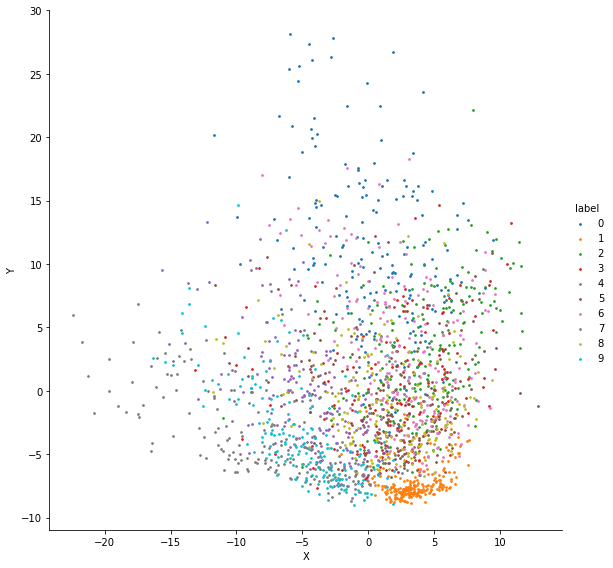

In [0]:

data_points = 2000
plot_point_size =3
fig_size= 8 

pla_plot(data_points,plot_point_size,fig_size )

###t-SNE

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


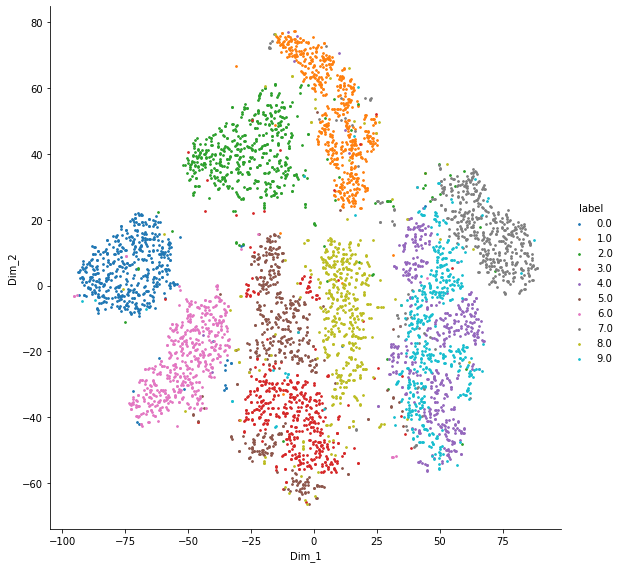

In [0]:
from sklearn.manifold import TSNE
size  = 5000
plot_point_size = 3
fig_size = 8

model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(training_data[:size])

tsne_data = np.vstack((tsne_data.T, labels[:size])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", size=fig_size).map(plt.scatter, 'Dim_1', 'Dim_2',s=plot_point_size).add_legend()
plt.show()

TSNE on PCA50 :  In theory, the t-SNE algorithms maps the input to a map space of 2 or 3 dimensions. The input space is assumed to be a Gaussian distribution and the map space a t-distribution.


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


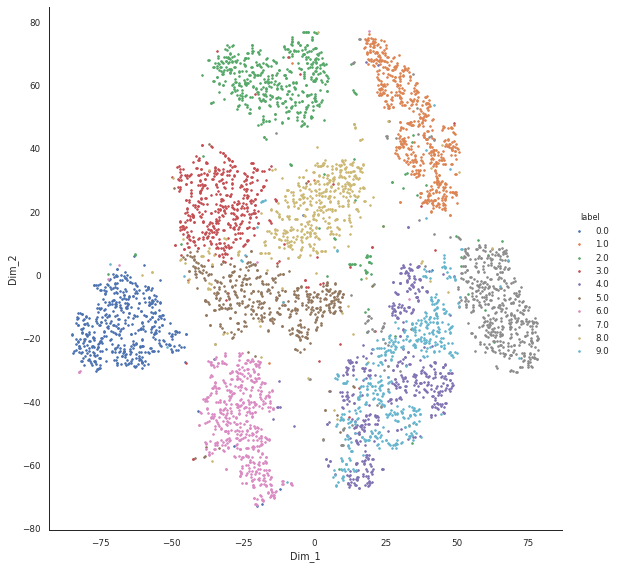

In [0]:
print("TSNE on PCA50 :  In theory, the t-SNE algorithms maps the input to a map space of 2 or 3 dimensions. The input space is assumed to be a Gaussian distribution and the map space a t-distribution.")
n_components = 50
size  = 5000
plot_point_size = 3
fig_size = 8

pca = PCA(n_components=n_components).fit(training_data[:size])
training_data_pca = pca.transform(training_data[:size])




model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(training_data_pca[:size])

tsne_data = np.vstack((tsne_data.T, labels[:size])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", size=fig_size).map(plt.scatter, 'Dim_1', 'Dim_2',s=plot_point_size).add_legend()
plt.show()


###UMAP

In [0]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

size = 5000

sns.set(context="paper", style="white")
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(training_data[:size])



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


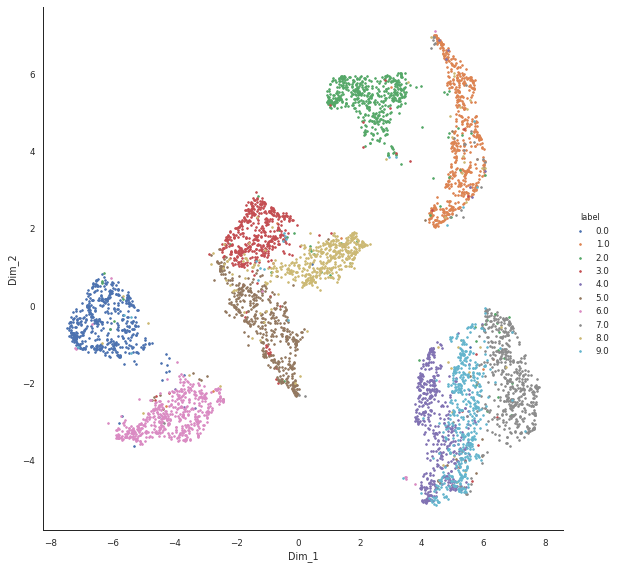

In [0]:
tsne_data = np.vstack((embedding.T, labels[:size])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", size=fig_size).map(plt.scatter, 'Dim_1', 'Dim_2',s=plot_point_size).add_legend()
plt.show()

###ISOMAP

In [0]:

from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)

training_data_isomap = manifold.Isomap(n_components=2).fit_transform(training_data[:size])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


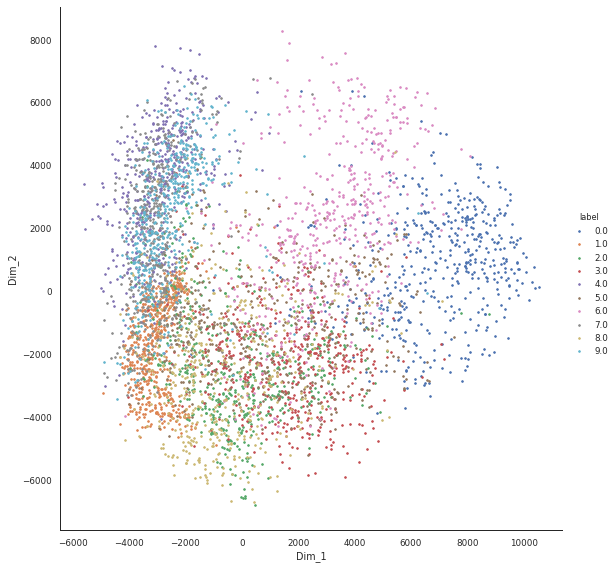

In [0]:
tsne_data = np.vstack((training_data_isomap.T, labels[:size])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", size=fig_size).map(plt.scatter, 'Dim_1', 'Dim_2',s=plot_point_size).add_legend()
plt.show()

###MDS

In [0]:
from sklearn.manifold import MDS
size=5000
embedding = MDS(n_components=2)
training_data_mds = embedding.fit_transform(training_data[:size])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


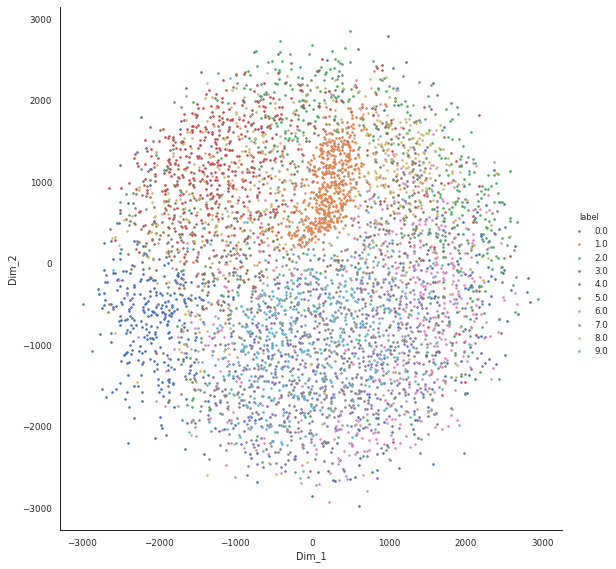

In [0]:
tsne_data = np.vstack((training_data_mds.T, labels[:size])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", size=fig_size).map(plt.scatter, 'Dim_1', 'Dim_2',s=plot_point_size).add_legend()
plt.show()